# Linear Regression Tutorial
This notebook demonstrates various concepts in linear regression, including:

- Simple linear regression with one variable
- Multiple linear regression with several variables
- Handling non-linear features
- Feature transformations and engineering
- Model comparison and evaluation

## Import necessary libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

# Apply a style ggplot to the plots
from matplotlib import style
style.use('ggplot')

# fix the random seed to ensure that the results are reproducible
np.random.seed(42)

## PART 1: SIMPLE LINEAR REGRESSION (ONE VARIABLE)

First, we'll demonstrate simple linear regression with a single input variable.

In [3]:
#f(x) = y = w.x + b

### Create a synthetic Dataset

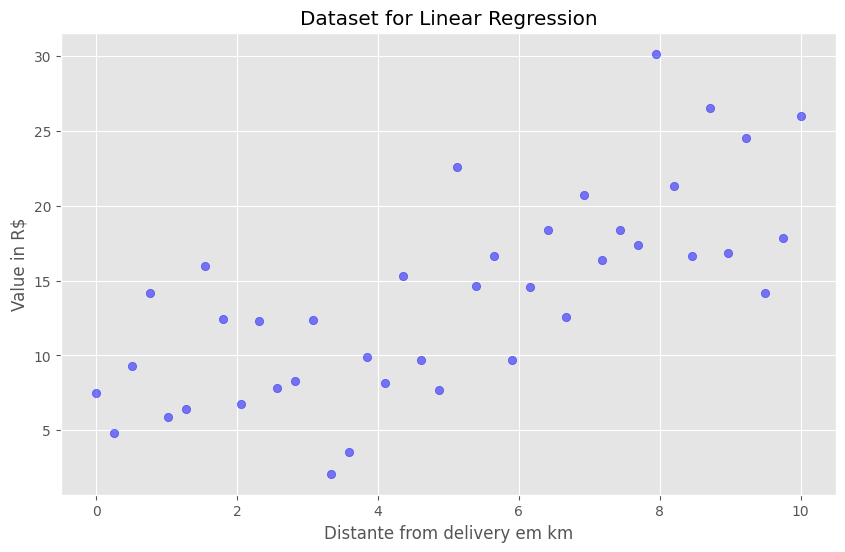

In [4]:
# Create a simple dataset for demonstration
n_samples = 40

# features
X = np.linspace(0, 10, n_samples).reshape(-1, 1) # reshape to make it a 2D array for sklearn change from (n_samples,) to (n_samples, 1)

# Target variable with some noise
# flatten() is used to convert the 2D array back to a 1D array for the linear equation
# if is only for view, we can use ravel() instead of flatten() to achieve the same result
y = 2 * X.flatten() + 5 + np.random.normal(0, 5, n_samples)  # y = 2x + 5 + gaussian noise

# Visualize the dataset
plt.figure(figsize=(10, 6)) # set the figure size to 10 inches wide and 6 inches tall
plt.scatter(X, y, color='blue', alpha=0.5) # create a scatter plot with X on the x-axis and y on the y-axis, with blue points and 50% transparency
plt.title('Dataset for Linear Regression')
plt.xlabel('Distante from delivery em km')
plt.ylabel('Value in R$')
plt.show()

### Fit model and obtain the parameters

In [5]:
# Create and train a simple linear regression model
model = LinearRegression() # create an instance of the LinearRegression class
model.fit(X, y) # fit the model to the data (X and y)

LinearRegression()

In [6]:
# Get the model parameters
w = model.coef_[0] # get the angular coefficient (slope/weight) of the linear model
b = model.intercept_ # get the linear coefficient (intercept/bias) of the linear model

print(f'Linear model parameters: w = {w:.2f}, b = {b:.2f}')

Linear model parameters: w = 1.60, b = 5.90


### Prediction

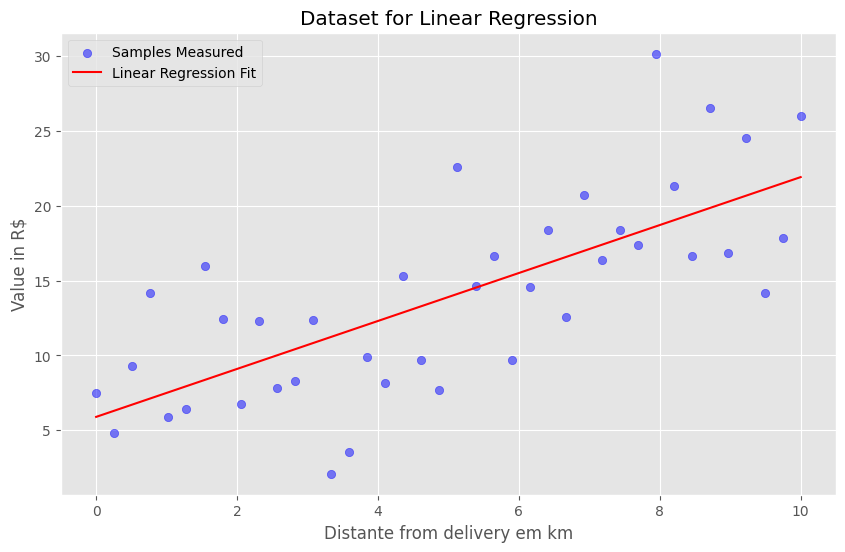


Simple Linear Regression Results:

Equation: y = 1.60x + 5.90
True Equation: y = 2x + 5 + noise

Mean Squared Error: 20.7408
Root Mean Squared Error: 4.5542
R-squared Score: 0.5201


In [7]:
# Make predictions using the trained model
y_pred = model.predict(X) # predict the target variable using the trained model and the input features X

# Calculate the loss function (Mean Squared Error and R-squared)
mse = mean_squared_error(y, y_pred) # calculate the mean squared error between the true values (y) and the predicted values (y_pred)
r2 = r2_score(y, y_pred) # calculate the R-squared score between the true values (y) and the predicted values (y_pred)
rmse = np.sqrt(mse) # calculate the root mean squared error by taking the square root of the mean squared error

# plot the regression line along with the original data points
plt.figure(figsize=(10, 6)) # set the figure size to 10 inches wide and 6 inches tall
plt.scatter(X, y, color='blue', alpha=0.5, label='Samples Measured') # create a scatter plot with label it as 'Samples Measured'
plt.plot(X, y_pred, color='red', label='Linear Regression Fit') # plot the predicted values (y_pred) as a red line and label it as 'Linear Regression Fit'
plt.title('Dataset for Linear Regression')
plt.xlabel('Distante from delivery em km')
plt.ylabel('Value in R$')
plt.legend() # add a legend to the plot
plt.show()

print('\nSimple Linear Regression Results:')
print(f'\nEquation: y = {w:.2f}x + {b:.2f}')
print('True Equation: y = 2x + 5 + noise\n')
print(f'Mean Squared Error: {mse:.4f}') # similar to the variance of the residuals, but uses the predicted value instead of the mean. Error's variance.
print(f'Root Mean Squared Error: {rmse:.4f}') # value that represents the standard deviation of the errors (prediction errors)
print(f'R-squared Score: {r2:.4f}') # value that compares the variancae of the residuals (MSE) with the variance of the data (variance of y)

###### Interpretation of the results:
# In the pratice, the RMSE is more important than the MSE, because it is in the same unit as the target variable (y), making it easier to interpret.
# RMSE equals to 3.92 seems that be model mistakes are around 3.92 (R$) on average for each prediction, which is a reasonable error given the noise in the data.
#
# The R-squared score indicates how well the model explains the variance in the data. The percentage of the explained variance for the model is 0.72 (72%).
# the rest of the variance (28%) is due to the noise in the data, which is expected given that we added random noise to the target variable (y).
# 
#***

## PART 2: MULTIPLE LINEAR REGRESSION

Now, let's extend to multiple linear regression with several input variables.

In [8]:
# f(x1, x2, x3) = y = w1.x1 + w2.x2 + w3.x3 + b

### Create and visualize a more complex synthetic Dataset

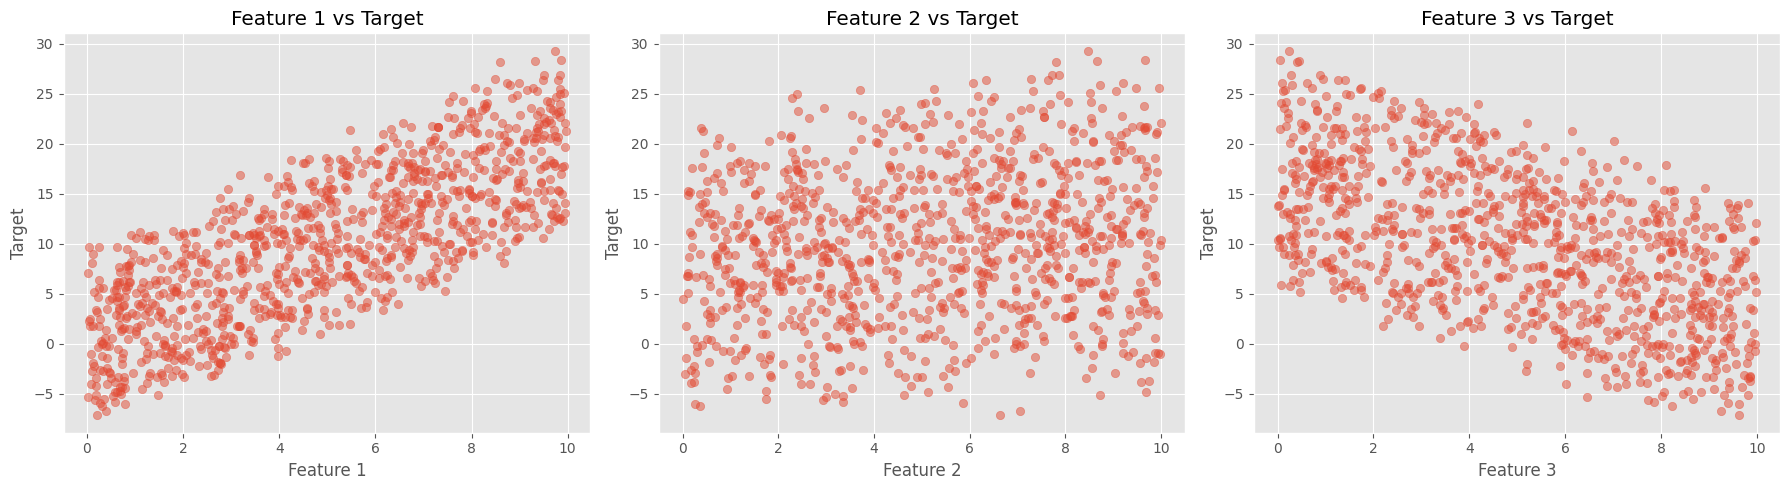

In [9]:
# Create a dataset with multiple features
n_samples = 1000

# rand() generates pseudorandom numbers between 0 and 1 with a uniform distribution.
X_multi = np.random.rand(n_samples, 3) * 10 # create a dataset with 1000 samples and 3 features, with values between 0 and 10

# New function with multiple features: y  = 2*x1 + 0.5*x2 - 1.5*x3 + 5 + noise
y_multi = (
    2 * X_multi[:, 0] +  # first feature (x1). Multiply the weight of 2 by the all values of the first column
    0.5 * X_multi[:, 1] -  # second feature (x2) with a weight of 0.5
    1.5 * X_multi[:, 2] +  # third feature (x3) with a weight of -1.5
    5 +  # intercept (bias) of the linear model
    np.random.normal(0, 1, n_samples)  # add Gaussian noise to the target variable (y_multi)
)

# Create a DataFrame for better visualization
df_multi = pd.DataFrame(X_multi, columns=['Feature 1', 'Feature 2', 'Feature 3']) # create a DataFrame with the features and name the columns
df_multi['target'] = y_multi # add the target variable (y_multi) to the DataFrame as a new column named 'target'

# Visualize the relationship between the features and the target 
fig, axs = plt.subplots(1, 3, figsize=(18, 5)) # create a figure with 3 subplots arranged in 1 row and 3 columns, with a total size of 18 inches wide and 5 inches tall
for i, feature in enumerate(['Feature 1', 'Feature 2', 'Feature 3']): # It loops through the elements and their respective subplot axes
    axs[i].scatter(df_multi[feature], df_multi['target'], alpha=0.5) # create a scatter plot for each feature against the target variable with 50% transparency
    axs[i].set_title(f'{feature} vs Target') # set the title of each subplot to indicate which feature is being plotted against the target variable
    axs[i].set_xlabel(feature) # set the x-axis label to the name of the feature
    axs[i].set_ylabel('Target') # set the y-axis label to 'Target'
plt.tight_layout() # adjust the layout of the subplots to prevent overlap
plt.show()

# the curves in the scatter plots is because of the weights of the features.

### Split and Train the multiple linear regression model

In [12]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split( # function to split the dataset from scikit-learn
    X_multi, y_multi, test_size=0.2, random_state=42 # random state is to set the seed of pseudorandom number generator
)

# If the data was temporal series, we would not use train_test_split, because generates leaking data from the future to the past.
# In this case, must use TimeSeriesSplit or a cronological split to ensure that the training data is from the past and the testing data is from the future.

# Train multiple linear regression model
model_multi = LinearRegression() 
model_multi.fit(X_train, y_train)

# Get the model parameters
weights = model_multi.coef_ # get the weights (coefficients) of the linear model for each feature
bias = model_multi.intercept_ # get the intercept (bias) of the linear model

# Make predictions using the trained model
y_train_pred = model_multi.predict(X_train) # predict the target variable for the training set, principally to diagnose underfitting or overfitting
y_test_pred = model_multi.predict(X_test) # predict the target variable for the testing set (predictions for the unseen data)

# Calculate metrics
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print('\nMultiple Linear Regression Results:')
print(f'\nEquation: y = {weights[0]:.4f}x1 + {weights[1]:.4f}x2 + {weights[2]:.4f}x3 + {bias:.4f}')
print('True Equation: y = 2*x1 + 0.5*x2 - 1.5*x3 + 5 + noise\n')
print(f'Training Mean Squared Error: {train_mse:.4f}')
print(f'Testing Mean Squared Error: {test_mse:.4f}')
print(f'\nTraining Root Mean Squared Error: {train_rmse:.4f}')
print(f'Testing Root Mean Squared Error: {test_rmse:.4f}')
print(f'\nTraining R-squared Score: {train_r2:.4f}')
print(f'Testing R-squared Score: {test_r2:.4f}')



Multiple Linear Regression Results:

Equation: y = 2.0233x1 + 0.4848x2 + -1.5128x3 + 5.0316
True Equation: y = 2*x1 + 0.5*x2 - 1.5*x3 + 5 + noise

Training Mean Squared Error: 1.0108
Testing Mean Squared Error: 0.9749

Training Root Mean Squared Error: 1.0054
Testing Root Mean Squared Error: 0.9874

Training R-squared Score: 0.9813
Testing R-squared Score: 0.9850
